In [1]:
# Importing necessary libraries for statistical analysis and graphing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from wordcloud import WordCloud

# Importing required libraries for textual analysis
from nltk.tokenize import word_tokenize

# Importing necessary libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.exceptions import DataConversionWarning

# Importing Deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Importing additional libraries for various usage
import random
import pickle
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
# Reading in the datafile
text_df = pd.read_csv('Data/data.csv')

In [3]:
# Formatting the data

# Changing all non-human sources to be 'AI Generated'
def change_ai(val):
    return 'AI Generated' if val != 'Human' else val
text_df['source'] = text_df['source'].apply(change_ai)

# Changing all human sources to be 'Human Content'
def change_human(val):
    return 'Human Content' if val == 'Human' else val
text_df['source'] = text_df['source'].apply(change_human)

# Calculating the number of texts for each format
hc = sum(text_df['source']=='Human Content')
ai = sum(text_df['source']=='AI Generated')

# Dropping Unnecessary Columns
text_df.drop(columns=['prompt_id', 'text_length', 'word_count'], inplace=True)

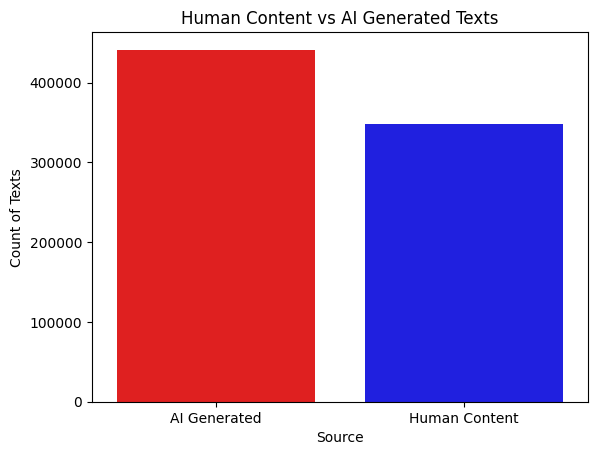

In [4]:
# Visualizing the Distribution of the data
custom_palette = {"AI Generated": "red", "Human Content": "blue"}
source_order = ['AI Generated', 'Human Content']
ax = sns.countplot(data=text_df, x='source', hue='source', order=source_order, palette=custom_palette)
ax.set_xlabel('Source')
ax.set_ylabel('Count of Texts')
ax.set_title('Human Content vs AI Generated Texts')
plt.show()

In [5]:
# Printing out summary data
print(f"{hc} pieces of text are Human Content")
print(f"{ai} pieces of text are AI Generated")
print(f"There are {hc+ai} pieces of text in total")

347692 pieces of text are Human Content
441230 pieces of text are AI Generated
There are 788922 pieces of text in total


In [6]:
# Creating Sample Dataframes for Human and AI Text

# Choosing a random state for consistency
rs = random.randint(1, 10000)

# Creating Filtered Dataframes
ai_df = text_df[text_df['source'] == 'AI Generated']
human_df = text_df[text_df['source'] == 'Human Content']

# Creating Sample Dataframes
ai_sample = ai_df.sample(n=1000, random_state=rs)
human_sample = human_df.sample(n=1000, random_state=rs)
text_sample = text_df.sample(n=150000, random_state=rs)

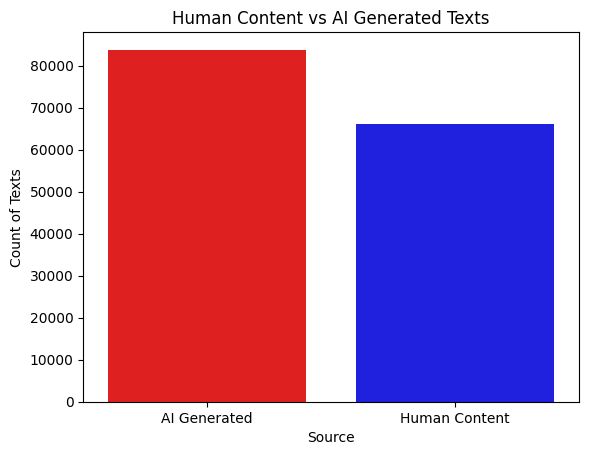

In [7]:
# Visualizing the Distribution of the sample data
custom_palette = {"AI Generated": "red", "Human Content": "blue"}
source_order = ['AI Generated', 'Human Content']
ax = sns.countplot(data=text_sample, x='source', hue='source', order=source_order, palette=custom_palette)
ax.set_xlabel('Source')
ax.set_ylabel('Count of Texts')
ax.set_title('Human Content vs AI Generated Texts')
plt.show()

In [8]:
# Calculating Sample Counts
hcs = sum(text_sample['source']=='Human Content')
ais = sum(text_sample['source']=='AI Generated')

# Printing out summary data
print(f"{hcs} pieces of text are Human Content")
print(f"{ais} pieces of text are AI Generated")
print(f"There are {hcs+ais} pieces of text in total")

66219 pieces of text are Human Content
83781 pieces of text are AI Generated
There are 150000 pieces of text in total


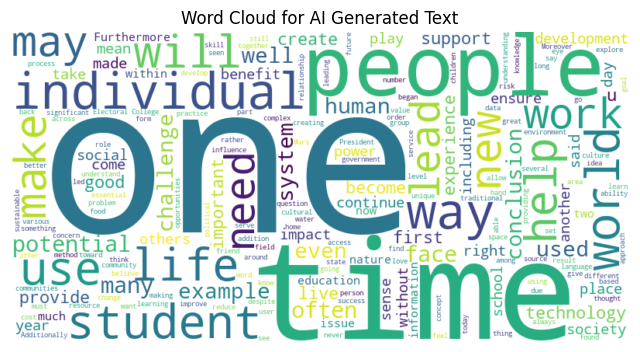

In [9]:
# Pulling only the text to form a string
ai_text = ' '.join(ai_sample['text'])

# Creating a WordCloud for the sample of AI Text
ai_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ai_text)

plt.figure(figsize=(8, 6))
plt.imshow(ai_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for AI Generated Text')
plt.axis('off')
plt.show()

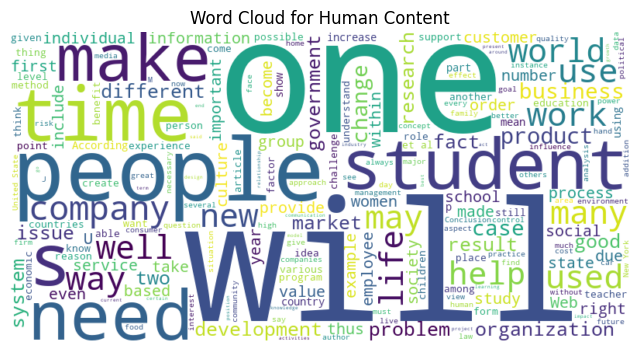

In [10]:
# Pulling only the text to form a string
human_text = ' '.join(human_sample['text'])

# Creating a WordCloud for the sample of Human Text
human_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(human_text)

plt.figure(figsize=(8, 6))
plt.imshow(human_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Human Content')
plt.axis('off')
plt.show()

In [11]:
# Vectorizing the words for textual analysis
tfidf_vectorizer = TfidfVectorizer(max_features=7500)
tfidf_vectors = tfidf_vectorizer.fit_transform(text_sample['text'])
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [12]:
# Splitting the data for training
x = tfidf_df.values
y = text_sample['source'].values  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
# Encode string labels -- Human Content and AI Generated -- to numerical representation with LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [14]:
# Creating a neural network as the model
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.35),
    Dense(64, activation='relu'),
    Dropout(0.35),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# Training the model
results = model.fit(x_train, y_train_encoded, epochs=25, batch_size=16, validation_data=(x_test, y_test_encoded), verbose=1)

Epoch 1/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 59s 7ms/step - accuracy: 0.7750 - loss: 0.4626 - val_accuracy: 0.8557 - val_loss: 0.3007
Epoch 2/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 47s 6ms/step - accuracy: 0.8726 - loss: 0.2780 - val_accuracy: 0.8694 - val_loss: 0.2761
Epoch 3/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 47s 6ms/step - accuracy: 0.8994 - loss: 0.2319 - val_accuracy: 0.8789 - val_loss: 0.2632
Epoch 4/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 46s 6ms/step - accuracy: 0.9227 - loss: 0.1895 - val_accuracy: 0.8875 - val_loss: 0.2558
Epoch 5/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 48s 6ms/step - accuracy: 0.9443 - loss: 0.1482 - val_accuracy: 0.8903 - val_loss: 0.2630
Epoch 6/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 45s 6ms/step - accuracy: 0.9575 - loss: 0.1167 - val_accuracy: 0.8911 - val_loss: 0.2766
Epoch 7/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - accuracy: 0.9698 - loss: 0.0875 - val_accuracy: 0.8925 - val_loss: 0.2886
Epoch 8/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - accuracy: 0.9775 - loss: 0

In [16]:
# Saving the TF-IDF tokenizer for future usage
with open('tfidf_tokenizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# Saving the model for future usage
model.save('text_classifier.keras')

In [17]:
# Creating predictions
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [18]:
# Testing the performance of the model against the testing dataset
sample_loss, sample_accuracy = model.evaluate(x_test, y_test_encoded)
print(f'Test Accuracy: {sample_accuracy:.4f}')

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8985 - loss: 0.6112
Test Accuracy: 0.8965


In [19]:
# Decoding the labels (0, 1) for readability
decoded_y_test = label_encoder.inverse_transform(y_test_encoded)
decoded_y_pred = label_encoder.inverse_transform(y_pred)

# Creating a classification report with custom labels
cr = classification_report(decoded_y_test, decoded_y_pred, target_names=label_encoder.classes_)
print(f"\n{cr}")


               precision    recall  f1-score   support

 AI Generated       0.88      0.94      0.91     16834
Human Content       0.92      0.84      0.88     13166

     accuracy                           0.90     30000
    macro avg       0.90      0.89      0.89     30000
 weighted avg       0.90      0.90      0.90     30000



In [20]:
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test_encoded, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9621


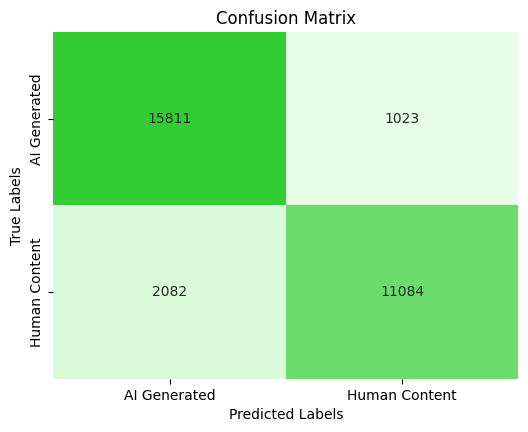

In [21]:
# Creating a numerical confusion matrix for this model
cm = confusion_matrix(y_test_encoded, y_pred)

# Define a custom colormapping for the heat map
colors = [(0.9, 1, 0.9), (0.2, 0.8, 0.2)]
n_bins = 100  
cmap_name = 'custom_green'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(6, 4.5))
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False,
            xticklabels=['AI Generated', 'Human Content'],
            yticklabels=['AI Generated', 'Human Content'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()